In [1]:
#Importing the packags
# pip install --user -U nltk
# pip install -U scikit-learn

import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ITC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Loading

In [2]:
df = pd.read_csv('UpdatedResumeDataSet.csv', encoding = 'latin1').astype(str)
df = df.sample(frac = 1)
df

,Category,Resume
520,Operations Manager,KEY COMPETENCIES Ã¢ÂÂ¶Multi - Operations Mana...
91,Advocate,Skills Legal Writing Efficient researcher Lega...
752,Hadoop,Areas of expertise Ã¢ÂÂ¢ Big Data Ecosystems:...
870,Blockchain,"SOFTWARE SKILLS: Languages: C, C++ & java Oper..."
413,Business Analyst,Key Skills - Requirement Gathering - Requireme...
...,...,...
497,Electrical Engineering,Education Details \r\n\r\nElectrical engineeri...
18,Data Science,Personal Skills Ã¢ÂÂ¢ Ability to quickly gras...
103,Advocate,Ã¢ÂÂ¢ Hard working Ã¢ÂÂ¢ Quick learnerEducat...
699,PMO,Skills Exceptional communication and networkin...


In [4]:
#No of a categories
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
ETL Developer                40
Mechanical Engineer          40
Sales                        40
Data Science                 40
Blockchain                   40
Arts                         36
Database                     33
PMO                          30
Electrical Engineering       30
Health and fitness           30
DotNet Developer             28
Business Analyst             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Analyzing Data

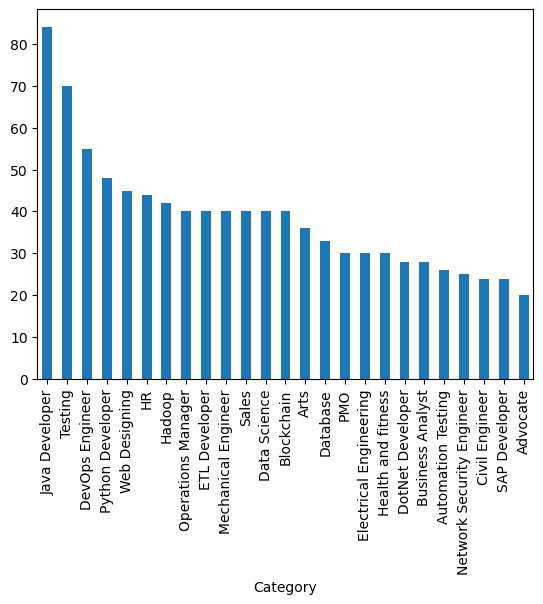

In [5]:
df['Category'].value_counts().plot.bar()
plt.show()

Data Processing

In [6]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ\x83Â¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investi

In [7]:
re.sub("[^a-zA-Z]", " ", df['Resume'][0].lower())

'skills   programming languages  python  pandas  numpy  scipy  scikit learn  matplotlib   sql  java  javascript jquery    machine learning  regression  svm  na    ve bayes  knn  random forest  decision trees  boosting techniques  cluster analysis  word embedding  sentiment analysis  natural language processing  dimensionality reduction  topic modelling  lda  nmf   pca   neural nets    database visualizations  mysql  sqlserver  cassandra  hbase  elasticsearch d  js  dc js  plotly  kibana  matplotlib  ggplot  tableau    others  regular expression  html  css  angular    logstash  kafka  python flask  git  docker  computer vision   open cv and understanding of deep learning education details     data science assurance associate     data science assurance associate   ernst   young llp  skill details   javascript  exprience      months  jquery  exprience      months  python  exprience      monthscompany details   company   ernst   young llp  description   fraud investigations and dispute ser

Stop Words

In [8]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ITC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data Cleaning Using Steamer

In [9]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing I love computers".split()
data = " ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
data

'i am love comput i love comput'

Data Cleaning Removing Stopwords

In [10]:
" ".join([stemmer.stem(i) for i in df['Resume'][0].split()])


'skill * program languages: python (pandas, numpy, scipy, scikit-learn, matplotlib), sql, java, javascript/jquery. * machin learning: regression, svm, naã\x83â¯v bayes, knn, random forest, decis trees, boost techniques, cluster analysis, word embedding, sentiment analysis, natur languag processing, dimension reduction, topic model (lda, nmf), pca & neural nets. * databas visualizations: mysql, sqlserver, cassandra, hbase, elasticsearch d3.js, dc.js, plotly, kibana, matplotlib, ggplot, tableau. * others: regular expression, html, css, angular 6, logstash, kafka, python flask, git, docker, comput vision - open cv and understand of deep learning.educ detail data scienc assur associ data scienc assur associ - ernst & young llp skill detail javascript- exprienc - 24 month jquery- exprienc - 24 month python- exprienc - 24 monthscompani detail compani - ernst & young llp descript - fraud investig and disput servic assur technolog assist review tar (technolog assist review) assist in acceler t

In [11]:
" ".join([i for i in df['Resume'][0].split() if i not in words])

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ\x83Â¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV understanding Deep learning.Education Details Data Science Assurance Associate Data Science Assurance Associate - Ernst & Young LLP Skill Details JAVASCRIPT- Exprience - 24 months jQuery- Exprience - 24 months Python- Exprience - 24 monthsCompany Details company - Ernst & Young LLP description - Fraud Investigations Dispute Services Assurance TECHNOLO

Doing all cleaning process using regex, stemmer, stopwords for all data

In [14]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

df['Resume'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['Resume']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df['Resume'].iloc[100]

'skills: ms office. photoshop. sql server.education details june 2015 bachelor yashwantrao chavan maharashtra university sales manager sales manager skill details ms office- exprience - 6 months ms sql server- exprience - 6 months photoshop- exprience - 6 months sql- exprience - 6 months sql server- exprience - 6 monthscompany details company - nature work description - generating leads calls, suggesting residential property per clients budget & specification, building relationship channel partner. ã¢â\x9eâ¢ meeting clients project presentation follow site visit deal closure. worked icici merchant services (hgs payroll) sales manager. (16th jan 2017 till 30th aug 2018) nature work: ã¢â\x9eâ¢ sales pos edc machine, sme loan, loan electronic payment. acquiring new merchants retaing existing merchants. ã¢â\x9eâ¢ cold calling casa team (icici bank) generating leads. ã¢â\x9eâ¢ field visit providing demo retailers shopkeeper sme & corporate merchant closing & signup. worked mahal pvt ltd. sr

In [15]:
df.to_csv('cleaned_resume_data.csv')

In [16]:
df['cleaned'] = df['Resume'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
df

,Category,Resume,cleaned
520,Operations Manager,key competencies ã¢ââ¶multi - operations mana...,key compet multi oper manag peopl manag custom...
91,Advocate,skills legal writing efficient researcher lega...,skill legal write effici research legal educ f...
752,Hadoop,areas expertise ã¢ââ¢ big data ecosystems: ha...,area expertis big data ecosystem hadoop hdf ma...
870,Blockchain,"software skills: languages: c, c++ & java oper...",softwar skill languag c c java oper system win...
413,Business Analyst,key skills - requirement gathering - requireme...,key skill requir gather requir analysi design ...
...,...,...,...
497,Electrical Engineering,education details electrical engineering skill...,educ detail electr engin skill detail microsft...
18,Data Science,personal skills ã¢ââ¢ ability quickly grasp t...,person skill abil quickli grasp technic aspect...
103,Advocate,ã¢ââ¢ hard working ã¢ââ¢ quick learnereducat...,hard work quick learnereduc detail june may ll...
699,PMO,skills exceptional communication networking sk...,skill except commun network skill success work...


Training Model

In [17]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()


In [18]:
X = df['cleaned']
Y = df['Category'].astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=5000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
with open('Resume_Data.pickle', 'wb') as f:
    pickle.dump(model, f)

In [20]:
X_test

349    technic skill skill java sql pl sql c c bootst...
113    educ detail januari rachana sansad school inte...
787    skill set talend big data informatica power ce...
509    educ detail juli may electr electron engin bho...
20     skill program languag python panda numpi scipi...
                             ...                        
639    skill visa b visa usa onsit visit sweden us se...
257    key skill plan strateg present skill client re...
214    hard work person self confid mould work enviro...
665    skill set cisco certifi network associ ccna ba...
648    skill visa b visa usa onsit visit sweden us se...
Name: cleaned, Length: 145, dtype: object

In [21]:
y_test

349               Java Developer
113                         Arts
787                ETL Developer
509       Electrical Engineering
20                  Data Science
                 ...            
639              DevOps Engineer
257                        Sales
214          Mechanical Engineer
665    Network Security Engineer
648              DevOps Engineer
Name: Category, Length: 145, dtype: object

Checking Test Accuracy

In [22]:
from sklearn.metrics import accuracy_score

predict_resume_cat = model.predict(X_test)

print(accuracy_score(y_test,predict_resume_cat))

0.9862068965517241


Checking Train Accuracy

In [23]:
from sklearn.metrics import accuracy_score

predict_resume_cat = model.predict(X_train)

print(accuracy_score(y_train,predict_resume_cat))


0.9975520195838433


Checking Model

In [29]:

resume = input("Enter resume = ")
resume_data = {'predict_resume_type':[resume]}
resume_data_df = pd.DataFrame(resume_data)
resume_data_df['predict_resume_type'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), resume_data_df['predict_resume_type']))
resume_data_df['predict_resume_type'] = resume_data_df['predict_resume_type'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

predict_resume_cat = model.predict(resume_data_df['predict_resume_type'])
print("Predicted resume category = ",predict_resume_cat[0])

Enter resume =  MAHESH BAHADUR THAPA  An Engineer/Teacher  Shantinagar-31 ,  kathmandu 9840776800 maheshthapa3150@gmail.com   @ https://www.linkedin.com/in/mahesh-thapa-001b36364/  Motivated & inquisitive Computer Engineering graduate with rapidly solidifying background in Python, data analysis and machine  learning-based problems. Working in Data Science, AI and ML via self learning, projects and hands on experiments. Interested in  solving on real-life challenging problems with data and algorithms Hands-on experiences with Pandas, NumPy, Seaborn and Plotly I  am excited to work on meaningful AI/ML projects and to further grow my expertise in model development, computer vision. Able to  teach themselves new things in a research-based environment where I need to learn quickly.  EXPERIENCE  Computer/Mathematics teacher  Kindergarten English Boarding School  Customer Service Representative  Daraz Nepal  Kailali  Mar, 2019 - Oct, 2019  Kathmandu  Dec, 2023 - Jan, 2024  Managed and resolv

Predicted resume category =  Data Science


In [30]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         2
                     Arts       1.00      1.00      1.00         5
       Automation Testing       1.00      1.00      1.00         3
               Blockchain       1.00      1.00      1.00         6
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         4
             Data Science       1.00      1.00      1.00         8
                 Database       1.00      1.00      1.00         2
          DevOps Engineer       1.00      0.80      0.89        10
         DotNet Developer       0.80      1.00      0.89         4
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         9
                       HR       1.00      1.00      1.00         2
                   Hadoop       1.00      1.00      1.00     

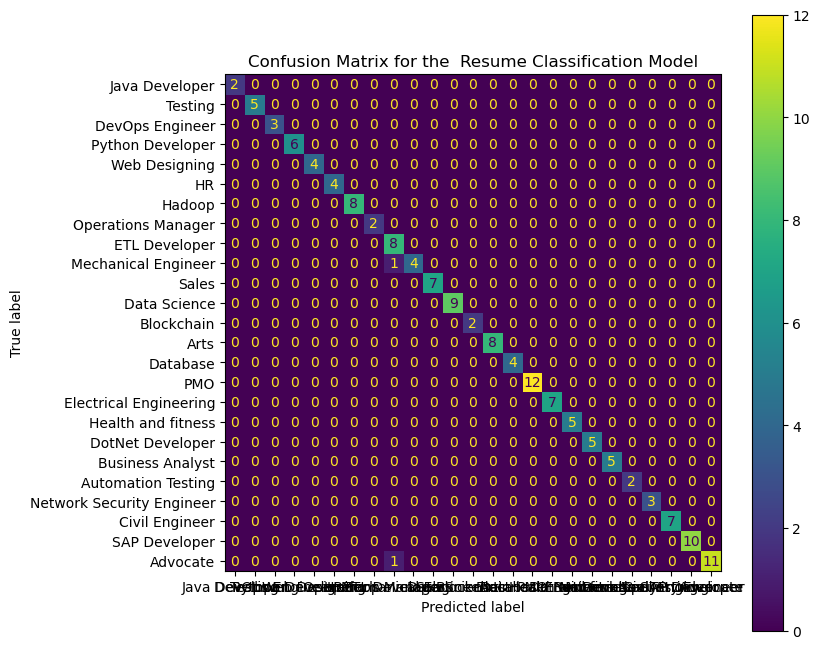

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['Java Developer','Testing','DevOps Engineer','Python Developer','Web Designing','HR','Hadoop','Operations Manager','ETL Developer','Mechanical Engineer',                          
               'Sales','Data Science','Blockchain','Arts','Database','PMO','Electrical Engineering','Health and fitness','DotNet Developer','Business Analyst',      
               'Automation Testing','Network Security Engineer','Civil Engineer','SAP Developer','Advocate']
                
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Resume Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);